## Observations and Insights 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = combined_mouse_data['Mouse ID'].count()
print(mice_count)

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
remove_duplicate_mice = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(remove_duplicate_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(remove_duplicate_mice)==False]


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_mice_data["Mouse ID"].value_counts()
clean_num_of_mice=len(clean_mice)
print(clean_num_of_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_group = clean_mice_data.groupby("Drug Regimen")

#mean
regimen_mean = regimen_group.mean()["Tumor Volume (mm3)"]

#median
regimen_median = regimen_group.median()["Tumor Volume (mm3)"]

#variance
regimen_variance = regimen_group.var()["Tumor Volume (mm3)"]

#standard deviation std
regimen_std = regimen_group.std()["Tumor Volume (mm3)"]

#SEM sem
regimen_sem = regimen_group.sem()["Tumor Volume (mm3)"]



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_rename = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = regimen_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regiman')

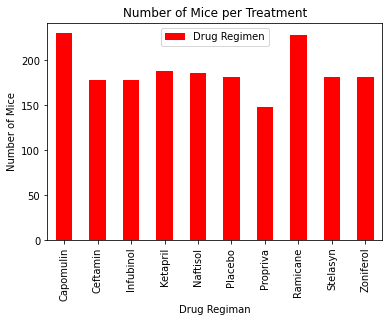

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_group_count = pd.DataFrame(regimen_group['Drug Regimen'].count())
regimen_group_count.plot(kind="bar", facecolor="red")

plt.title("Number of Mice per Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regiman")

Text(0.5, 0, 'Drug Regiman')

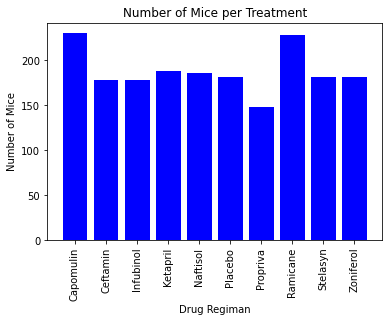

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(regimen_group_count))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, regimen_group_count["Drug Regimen"], color="b", align="center")
plt.xticks(tick_locations, list(regimen_group_count.index), rotation="vertical")

plt.title("Number of Mice per Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regiman")


In [11]:
gender_groups = combined_mouse_data.groupby('Sex')
gender_group_count = pd.DataFrame(gender_groups['Sex'].count())
gender_group_count

,Sex
Sex,
Female,935
Male,958


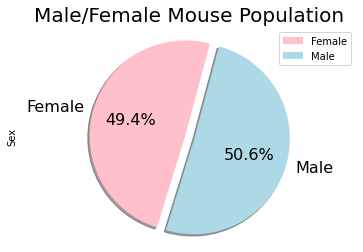

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['green', 'blue']
explode = (0.1, 0)
plot = gender_group_count.plot.pie(y='Sex', explode=explode, fontsize=16, colors =["pink","lightblue"],
        autopct="%1.1f%%", shadow=True, startangle=75)

plt.axis("equal")
plt.title('Male/Female Mouse Population',fontsize = 20)

plt.show()

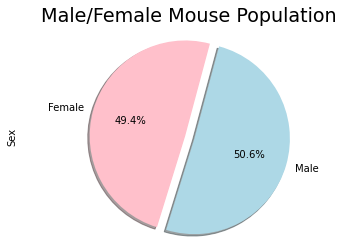

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = list(gender_group_count.index.values)
gender_count = gender_group_count["Sex"]
colors = ["pink", "lightblue"]
plt.pie(gender_count, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=75)
plt.rcParams['font.size'] = 16
plt.title("Male/Female Mouse Population")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_regimens = combined_mouse_data[combined_mouse_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
drug_regimens = drug_regimens.sort_values(["Timepoint"], ascending=True)
drug_regimens

drug_regimens_data = drug_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

drug_regimens_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_list = []

for drug in drug_regimens_data:
    tumor_list.append(list(drug_regimens_data["Tumor Volume (mm3)"].dropna()))


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

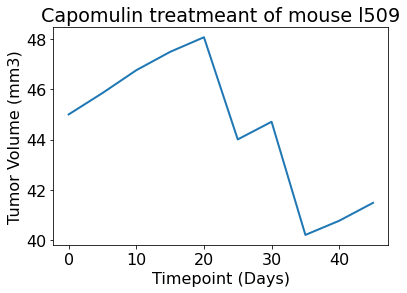

In [110]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] == "Capomulin",:]
forline_df = capomulin_df.loc[cap_df["Mouse ID"] == "l509",:]
x_axis_time = forline_df["Timepoint"]
tumor_size = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis_time, tumor_size,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

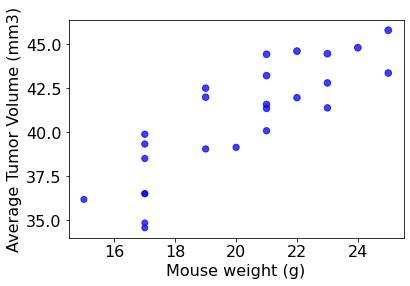

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = combined_mouse_data.loc[combined_mouse_data['Drug Regimen'] == 'Capomulin']
cap_id = capomulin_data.groupby(['Mouse ID']).agg(\
        Mouse_weight=('Weight (g)', np.mean),\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)


plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='b',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

plt.xlabel("Mouse weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [98]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_id['Mouse_weight'],cap_id['Tumor_vol_mean'])
round(correlation[0],2)

round(correlation[0],2)

0.84

The r-squared is: 0.7088732387169576


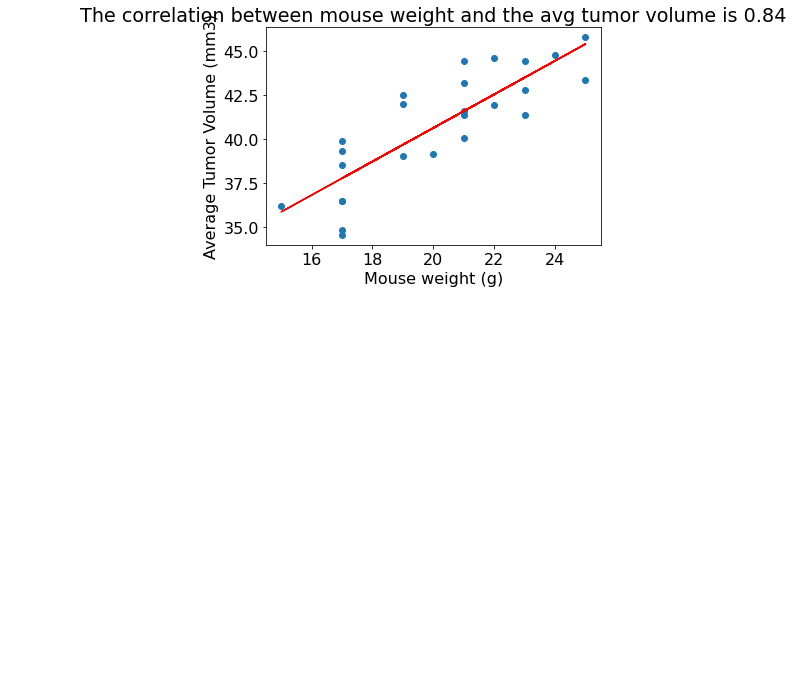

In [106]:
x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("The correlation between mouse weight and the avg tumor volume is 0.84")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")

plt.show()